# Assignment 2_2: Hopfield Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from hopfield import HopfieldNetwork

In [2]:
p0 = reshape_vector_to_image('p0.csv')
p1 = reshape_vector_to_image('p1.csv')
p2 = reshape_vector_to_image('p2.csv')

data = np.array([p0.reshape(-1), p1.reshape(-1), p2.reshape(-1)])
net = HopfieldNetwork(data)

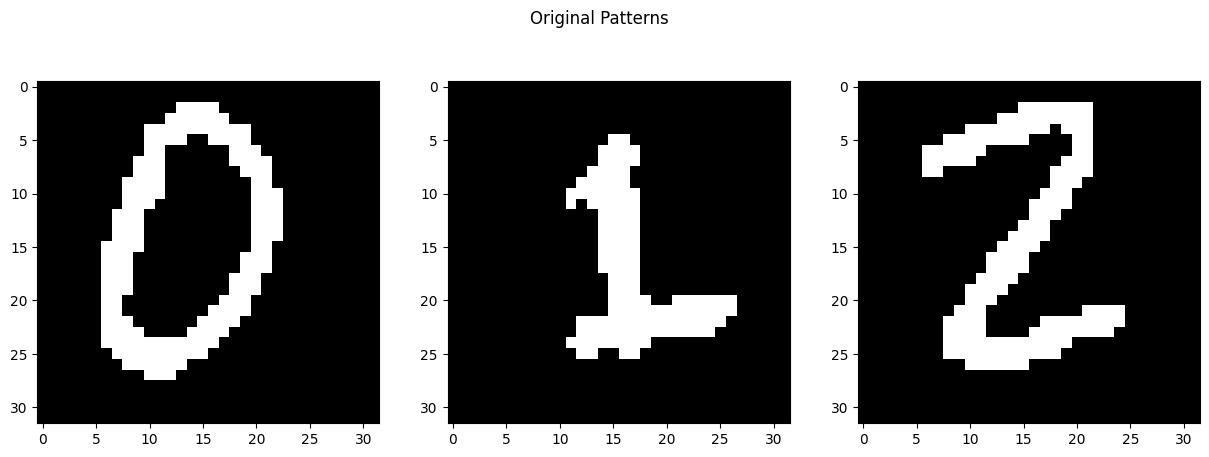

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Original Patterns')

axs[0].imshow(p0, cmap='gray')
axs[1].imshow(p1, cmap='gray')
axs[2].imshow(p2, cmap='gray')

## Digit: 0

In [4]:
# compute the 2 noisy images
p0_05 = distort_image(p0, 0.05)
p0_10 = distort_image(p0, 0.10)
p0_25 = distort_image(p0, 0.25)

In [5]:
p0_05_retrieved, e05_history, o05_history = net(p0_05.reshape(-1), true_pattern=p0.reshape(-1))
p0_10_retrieved, e10_history, o10_history = net(p0_10.reshape(-1), true_pattern=p0.reshape(-1))
p0_25_retrieved, e25_history, o25_history = net(p0_25.reshape(-1), true_pattern=p0.reshape(-1))

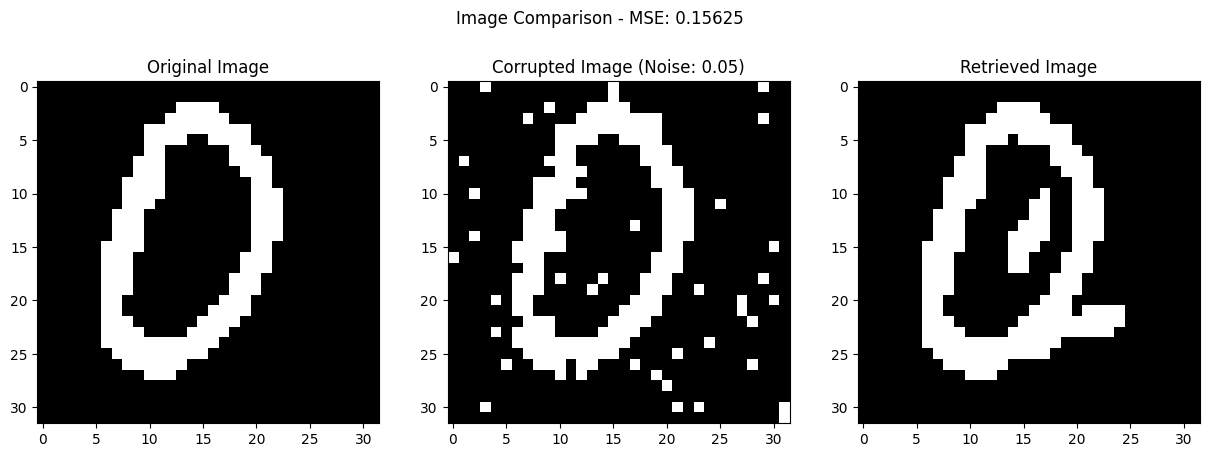

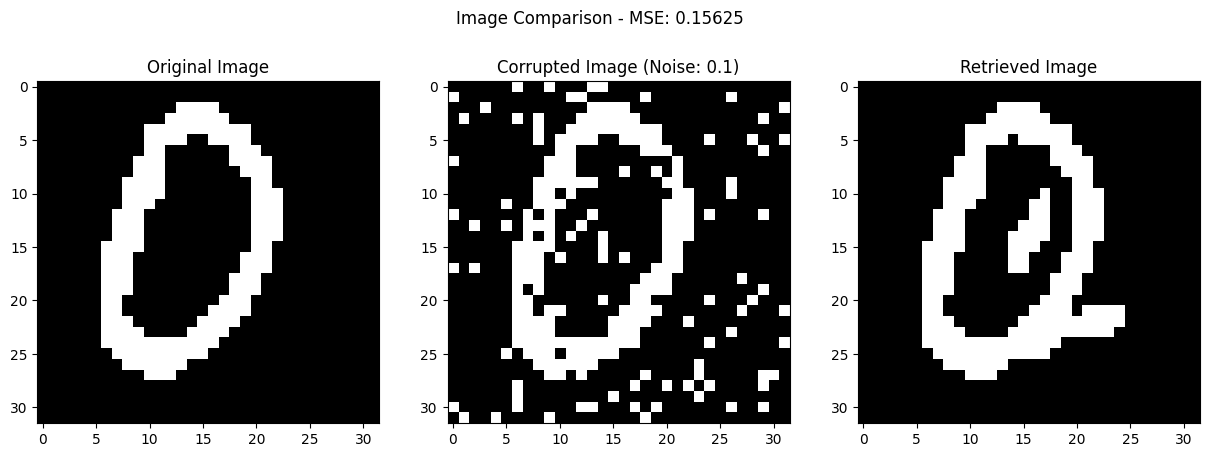

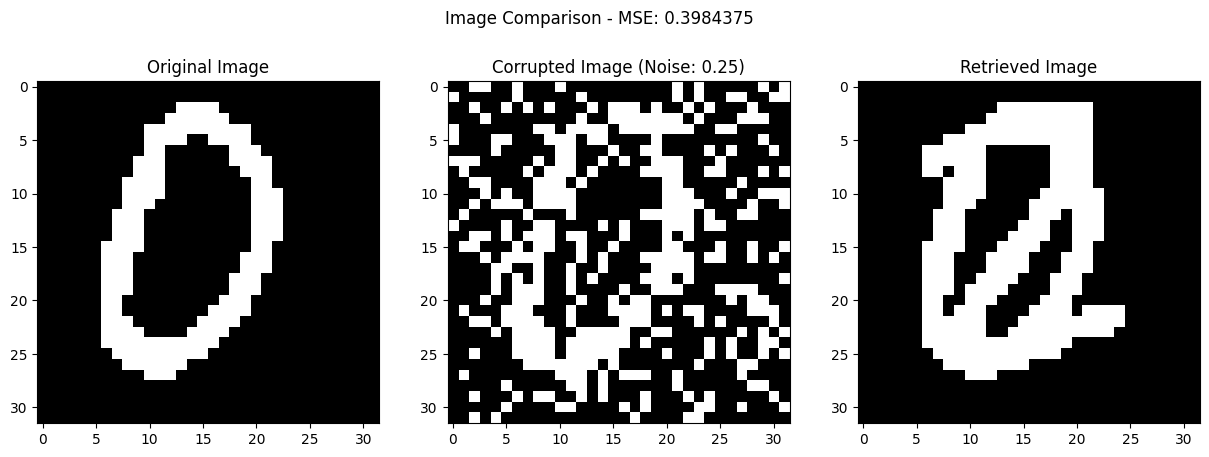

In [6]:
plot_images(p0, p0_05, p0_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p0, p0_10, p0_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p0, p0_25, p0_25_retrieved.reshape(p0.shape), noise=0.25)

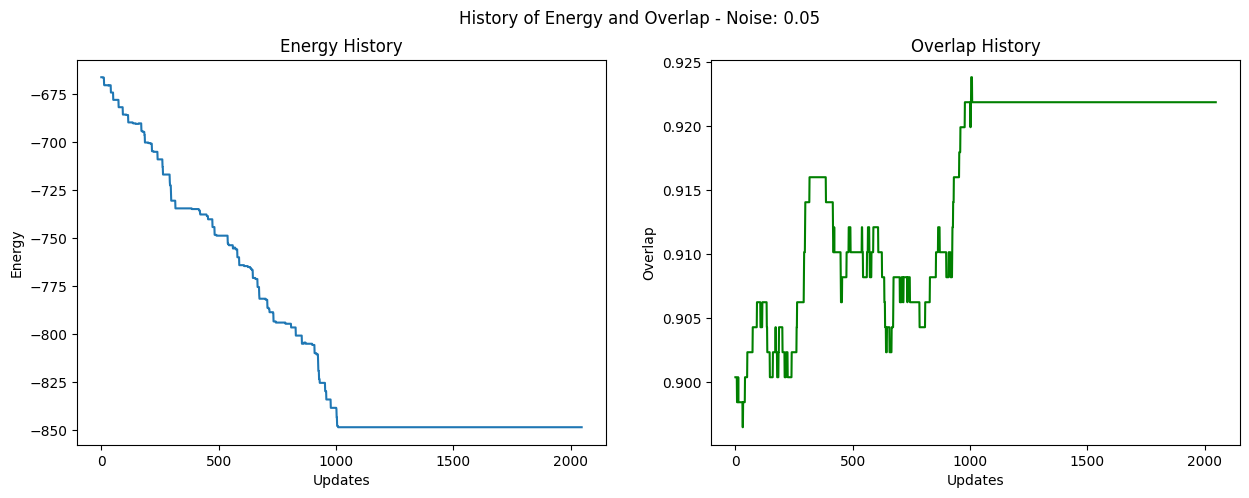

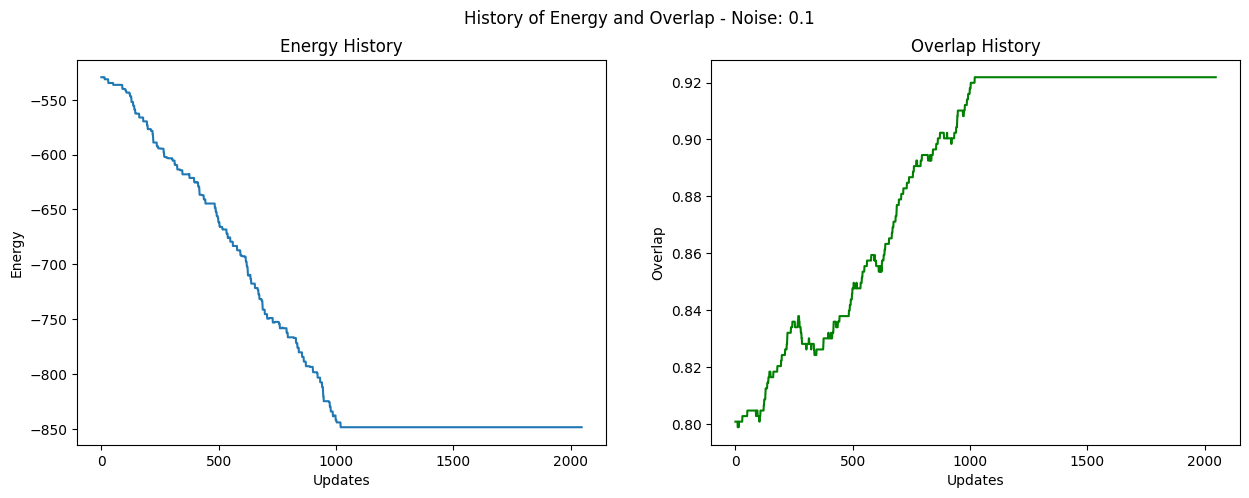

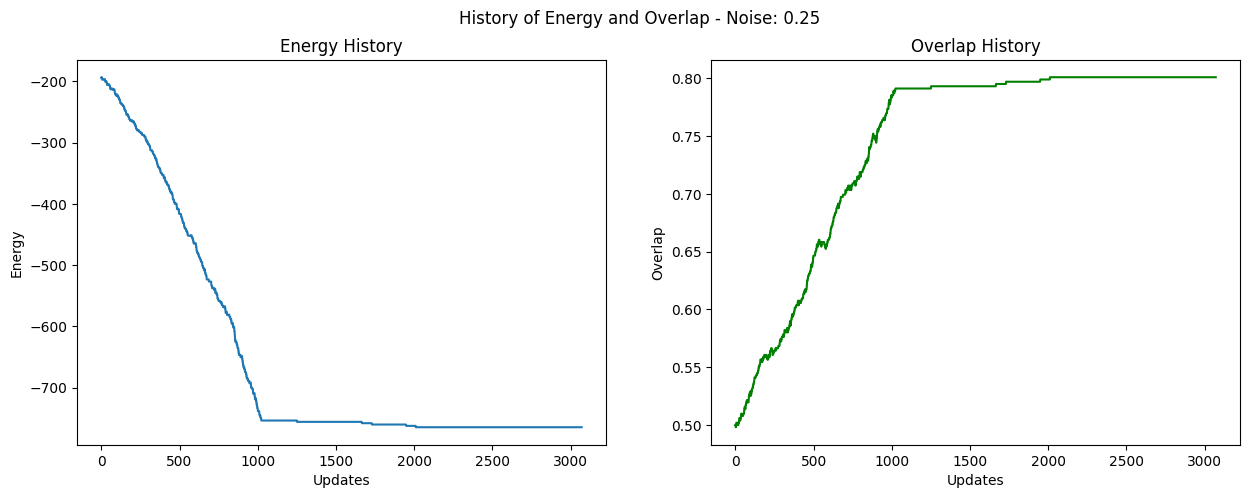

In [7]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Digit: 1

In [16]:
# compute the 2 noisy images
p1_05 = distort_image(p1, 0.05)
p1_10 = distort_image(p1, 0.10)
p1_25 = distort_image(p1, 0.25)

In [17]:
p1_05_retrieved, e05_history, o05_history = net(p1_05.reshape(-1), true_pattern=p1.reshape(-1))
p1_10_retrieved, e10_history, o10_history = net(p1_10.reshape(-1), true_pattern=p1.reshape(-1))
p1_25_retrieved, e25_history, o25_history = net(p1_25.reshape(-1), true_pattern=p1.reshape(-1))

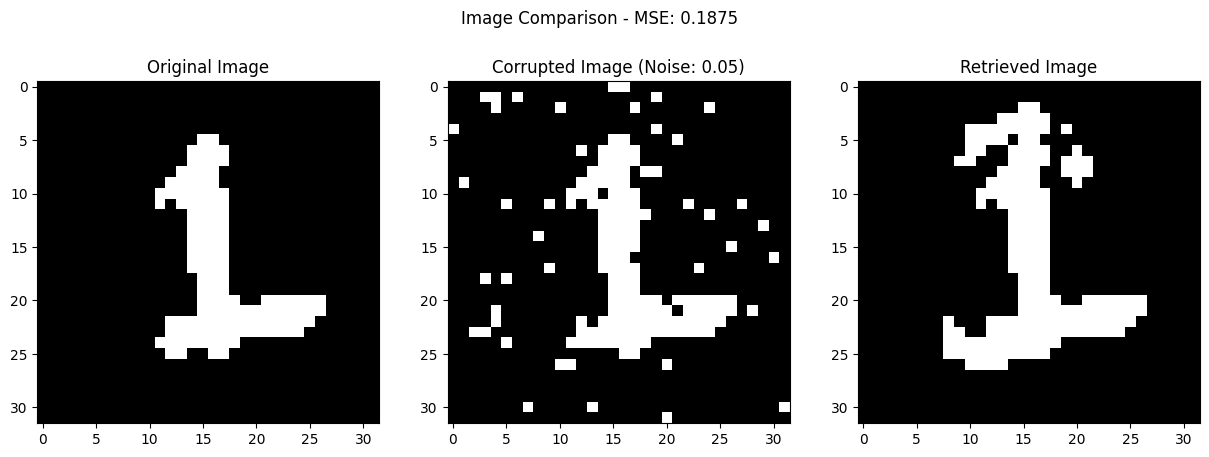

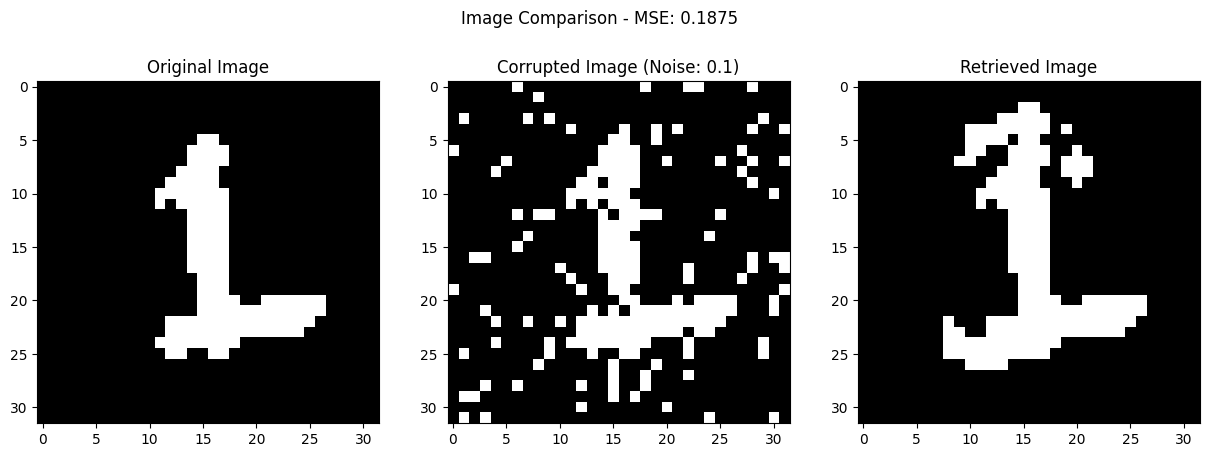

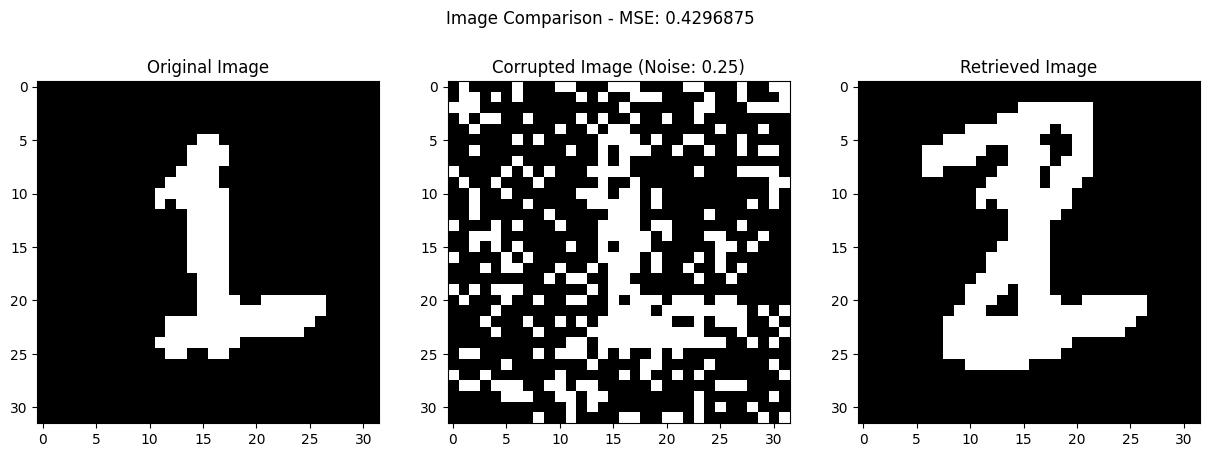

In [18]:
plot_images(p1, p1_05, p1_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p1, p1_10, p1_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p1, p1_25, p1_25_retrieved.reshape(p0.shape), noise=0.25)

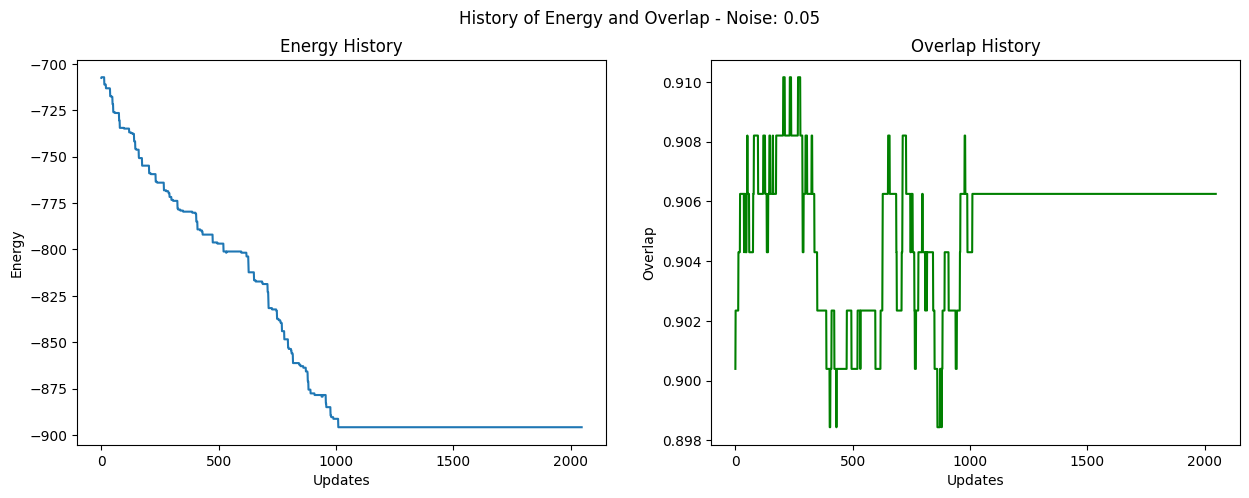

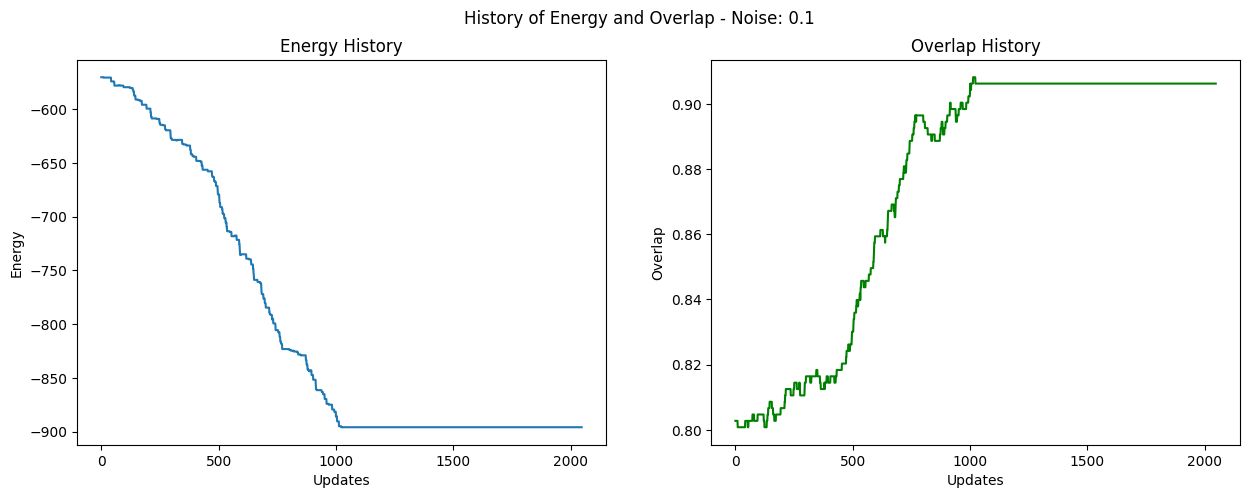

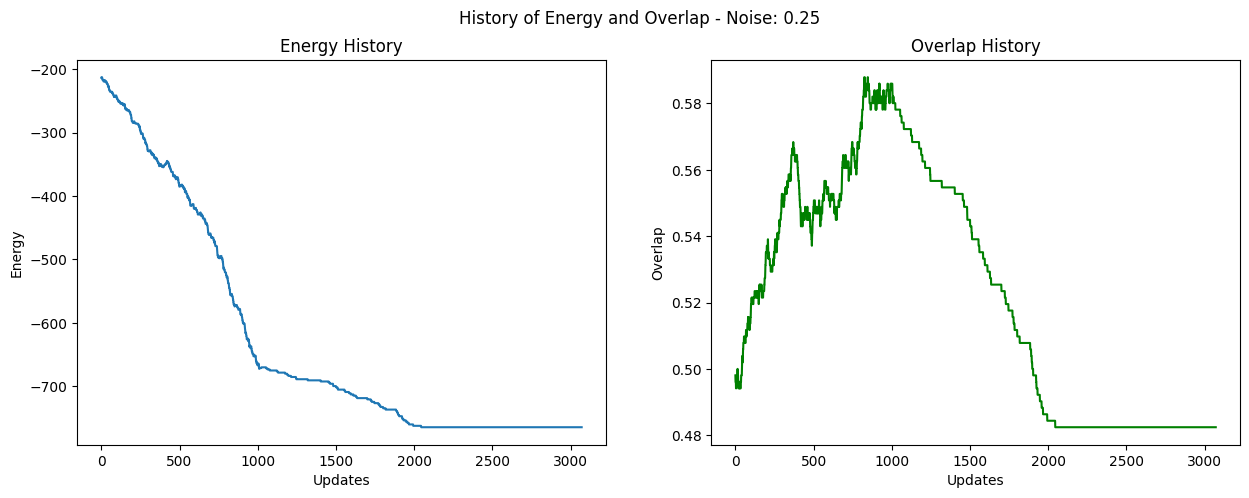

In [11]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

## Digit: 2

In [12]:
# compute the 2 noisy images
p2_05 = distort_image(p2, 0.05)
p2_10 = distort_image(p2, 0.10)
p2_25 = distort_image(p2, 0.25)

In [13]:
p2_05_retrieved, e05_history, o05_history = net(p2_05.reshape(-1), true_pattern=p2.reshape(-1))
p2_10_retrieved, e10_history, o10_history = net(p2_10.reshape(-1), true_pattern=p2.reshape(-1))
p2_25_retrieved, e25_history, o25_history = net(p2_25.reshape(-1), true_pattern=p2.reshape(-1))

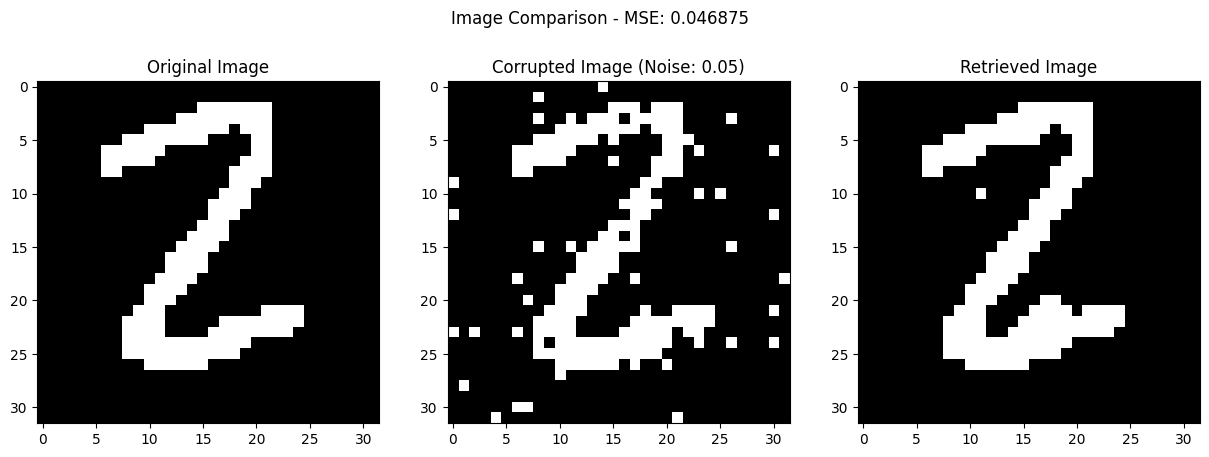

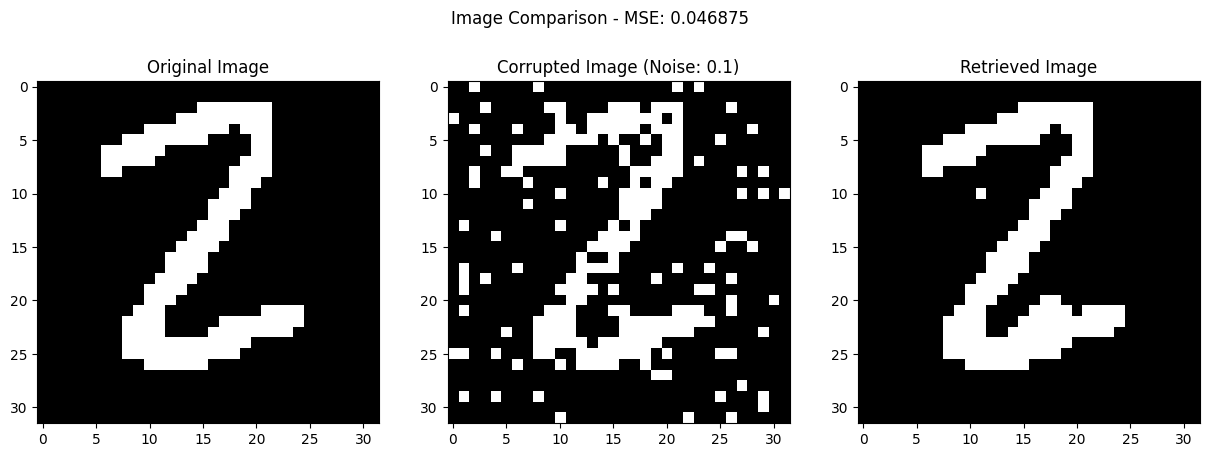

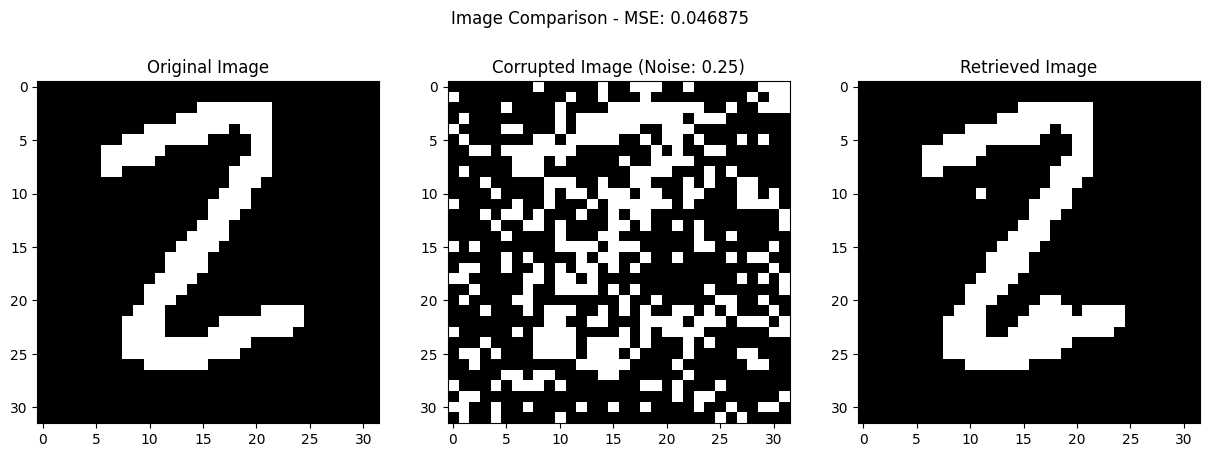

In [14]:
plot_images(p2, p2_05, p2_05_retrieved.reshape(p0.shape), noise=0.05)
plot_images(p2, p2_10, p2_10_retrieved.reshape(p0.shape), noise=0.10)
plot_images(p2, p2_25, p2_25_retrieved.reshape(p0.shape), noise=0.25)

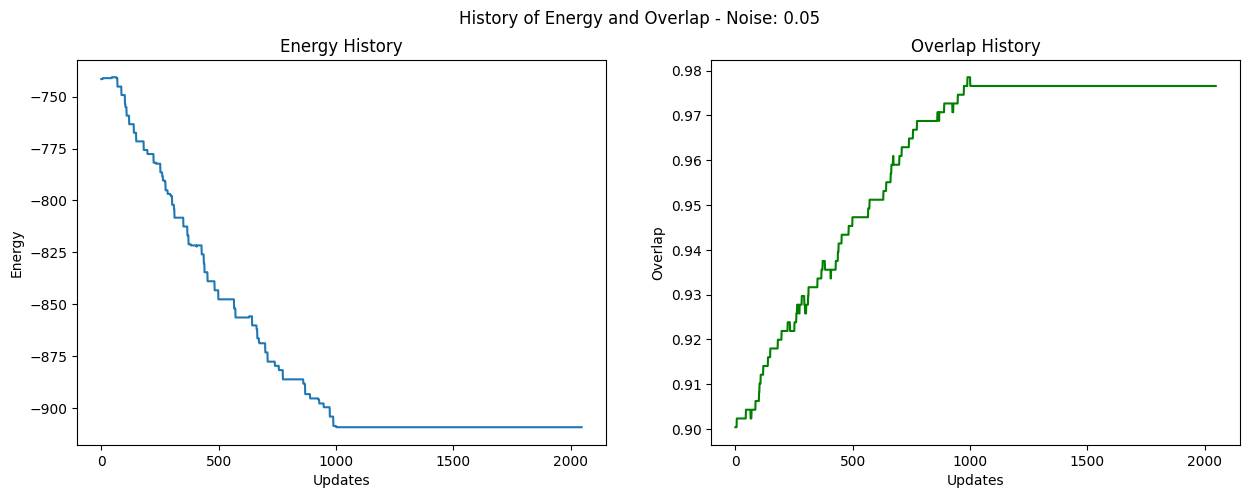

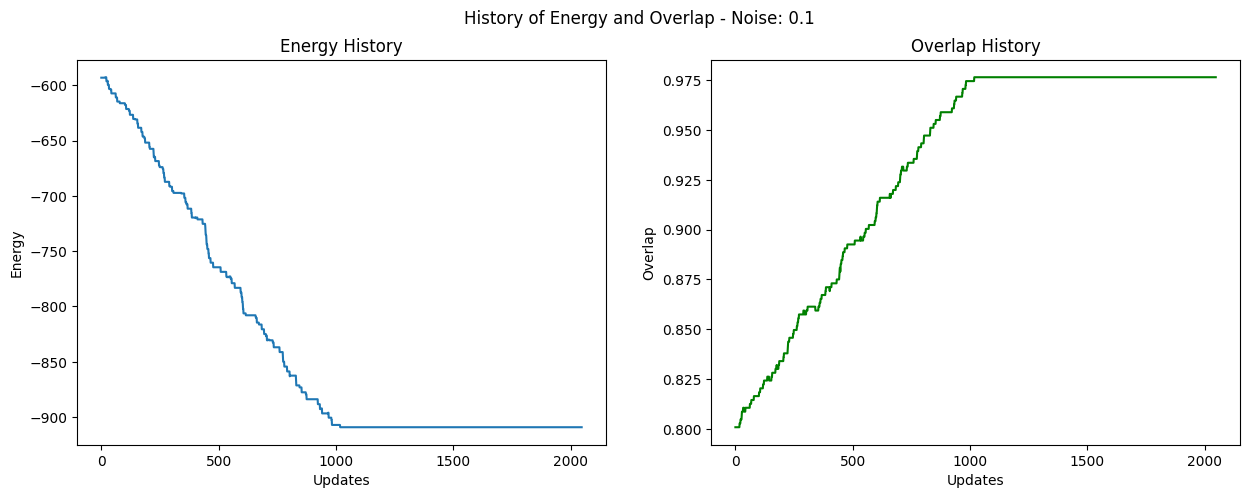

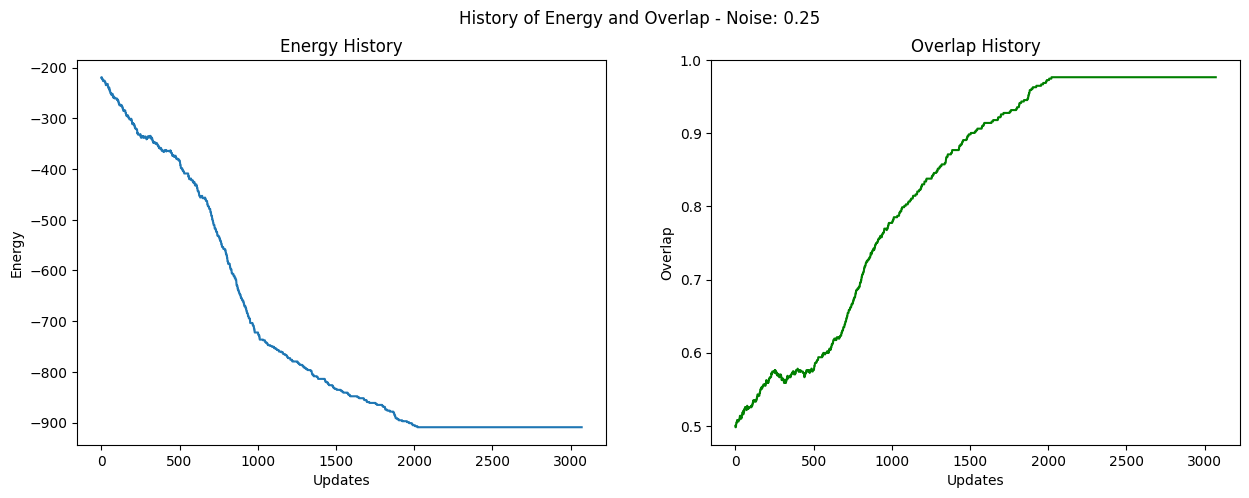

In [15]:
plot_history(e05_history, o05_history, noise=0.05)
plot_history(e10_history, o10_history, noise=0.10)
plot_history(e25_history, o25_history, noise=0.25)

# Bonus Track: All Digits

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from hopfield import HopfieldNetwork

In [41]:
data = []
d_data = [] # distorted data
for i in range(10):
    data.append(reshape_vector_to_image(f'p{i}.csv').reshape(-1)) # store the pattern as a vector
    d_data.append(distort_image(data[-1], 0.05))

data = np.array(data)

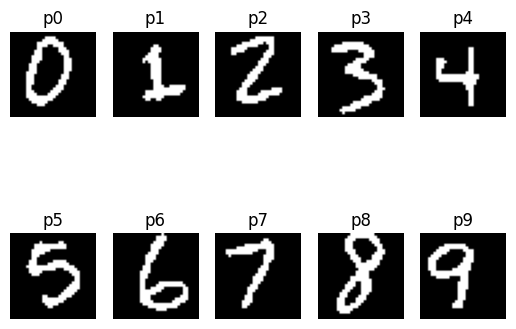

In [42]:
fig, axs = plt.subplots(2, 5)

for i in range(10):
    axs[i // 5, i % 5].imshow(data[i].reshape(32,32), cmap='gray')
    axs[i // 5, i % 5].set_title(f'p{i}')
    axs[i // 5, i % 5].set_axis_off()

In [43]:
def mse_and_overlap(net, d_data, true_data):
    '''
    Compute the average MSE (between the retrieved image and the original one) over the data and the overlap for each of the data

    Parameters:
    ----------
    net: HopfieldNetwork
        the Hopfield Network to use
    d_data: np.array
        the distorted data
    true_data: np.array
        the original data

    Returns:
    -------
    return: tuple
        the average MSE and the list of overlap for each data
    '''
    sum_mse = 0
    overlap_list = []
   
    for i in range(len(d_data)):
        retrieved, _, overlap = net(d_data[i], true_pattern=true_data[i])
        overlap_list.append(overlap)
        sum_mse += np.mean(np.square(retrieved - true_data[i]))
    
    return (sum_mse / len(d_data)), overlap_list

In [44]:
net_all = HopfieldNetwork(data[:3]) # only store the first 3 patterns at the beginning
mean_mse_history = []
overlap_history = []

mse, overlap = mse_and_overlap(net_all, d_data[:3], data[:3]) # compute mean mse and overlap of the first 3 patterns NOT added incrementally
mean_mse_history.append(mse)
overlap_history.append(overlap)

for i, pattern in enumerate(data[3:]):
    net_all.add_pattern(pattern) # store new pattern
    mse, overlap = mse_and_overlap(net_all, d_data[:i+4], data[:i+4]) # compute mean mse and overlap (overlap for each pattern)
    mean_mse_history.append(mse)
    overlap_history.append(overlap)

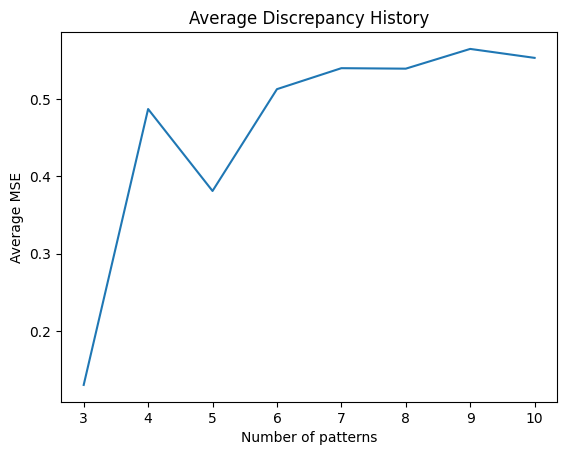

In [45]:
plt.plot(range(3, 11), mean_mse_history)
plt.xlabel('Number of patterns')
plt.ylabel('Average MSE')
plt.title('Average Discrepancy History')
plt.show()

In [68]:
def plot_overlaps(overlap_history, idx):
    '''
    Plot the overlap for each digit

    Parameters:
    ----------
    overlap_history: list
        each element of this list contains the overlap for each digit for a specific number of stored patterns 
        e.g.: overlap_history[0] contains the overlap 'plot' for digit 0, 1, 2
              overlap_history[1] contains the overlap 'plot' for digit 0, 1, 2, 3 and so on
    idx: int
        An index representing the specific element in overlap_history to plot. This determines which set of overlaps
        will be visualized. For example, if idx=0, the function will plot the overlap data for the first set of stored patterns
        (e.g., digits 0, 1, 2). If idx=1, the function will plot the overlap data for the next set of stored patterns (e.g., digits 0, 1, 2, 3).
        
    '''
    plt.figure(figsize=(20,10))
    for i, overlap in enumerate(overlap_history[idx]):
        plt.plot(overlap, label=f'Digit {i}')
        plt.xlabel('Steps')
        plt.ylabel('Overlap')
        plt.title(f'Patterns stored: {idx+3}')
    plt.legend()

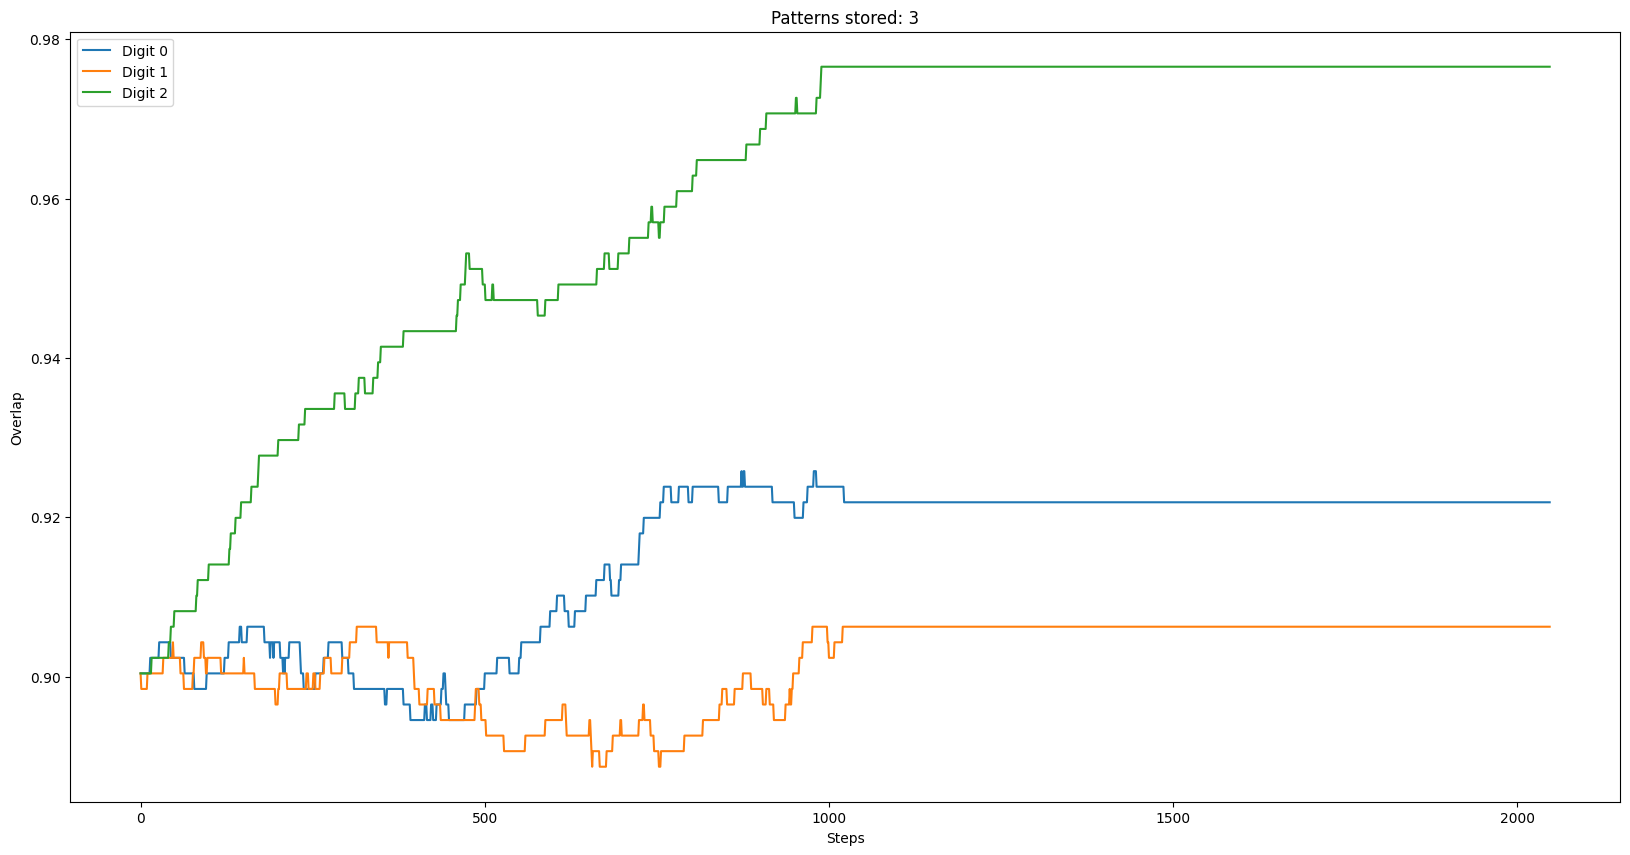

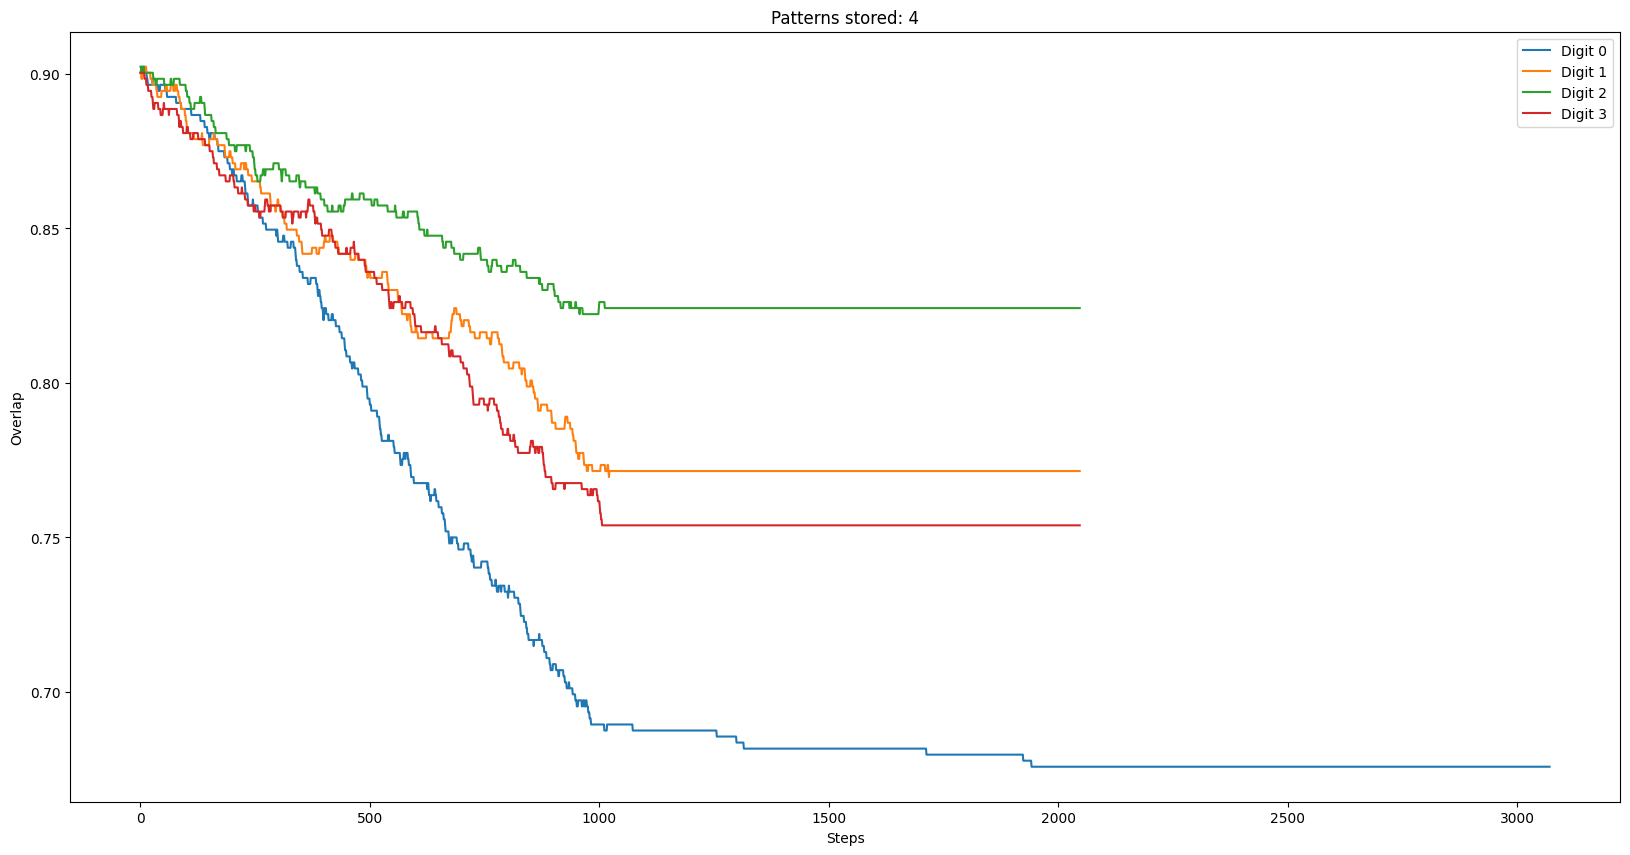

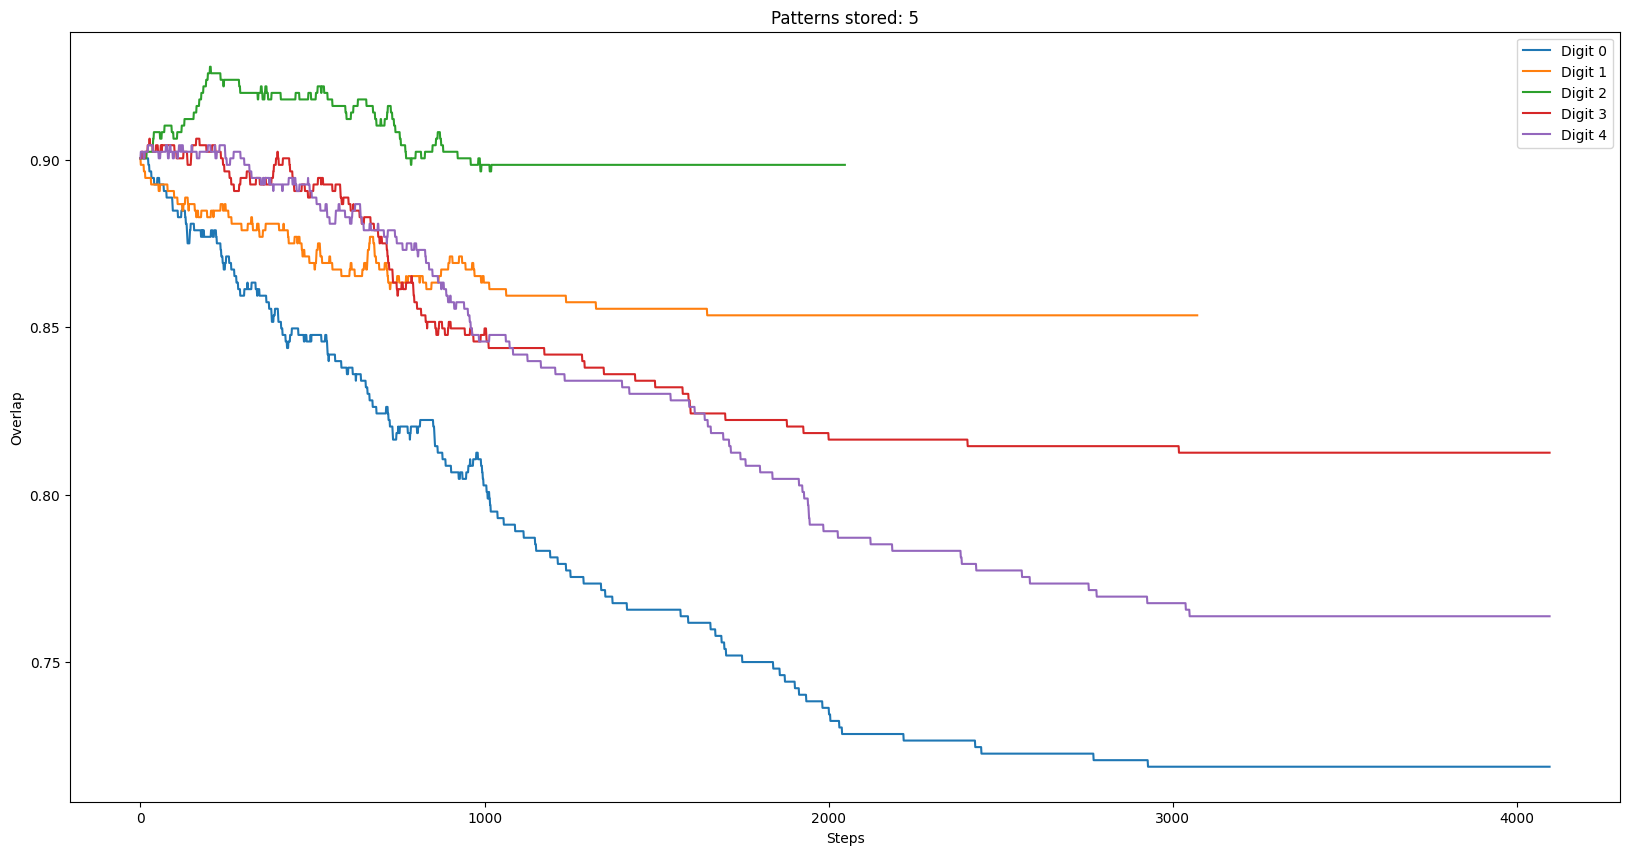

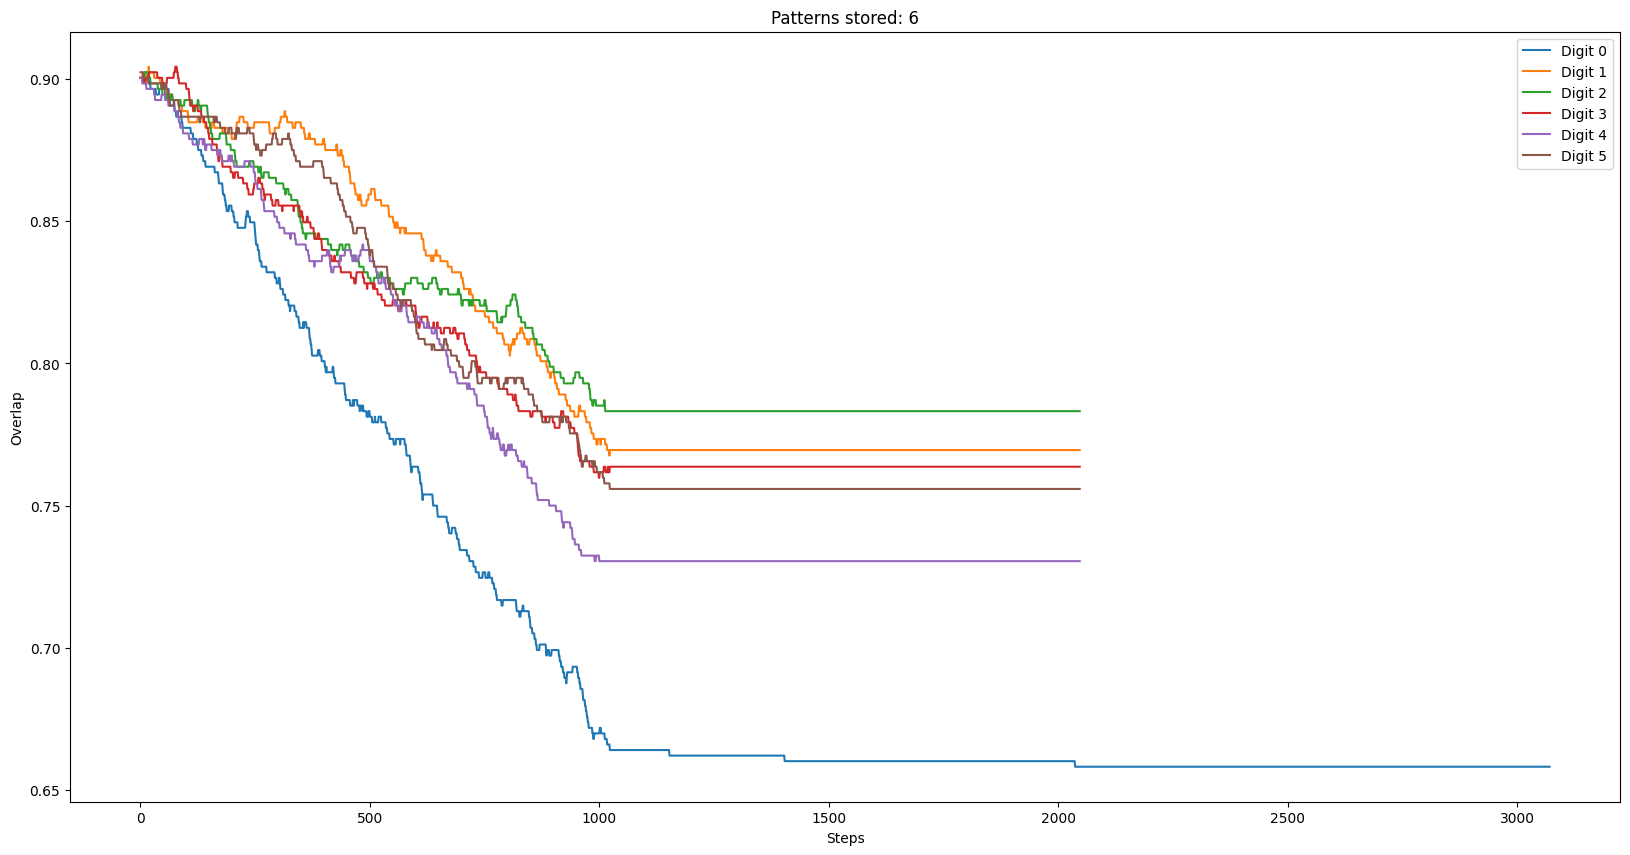

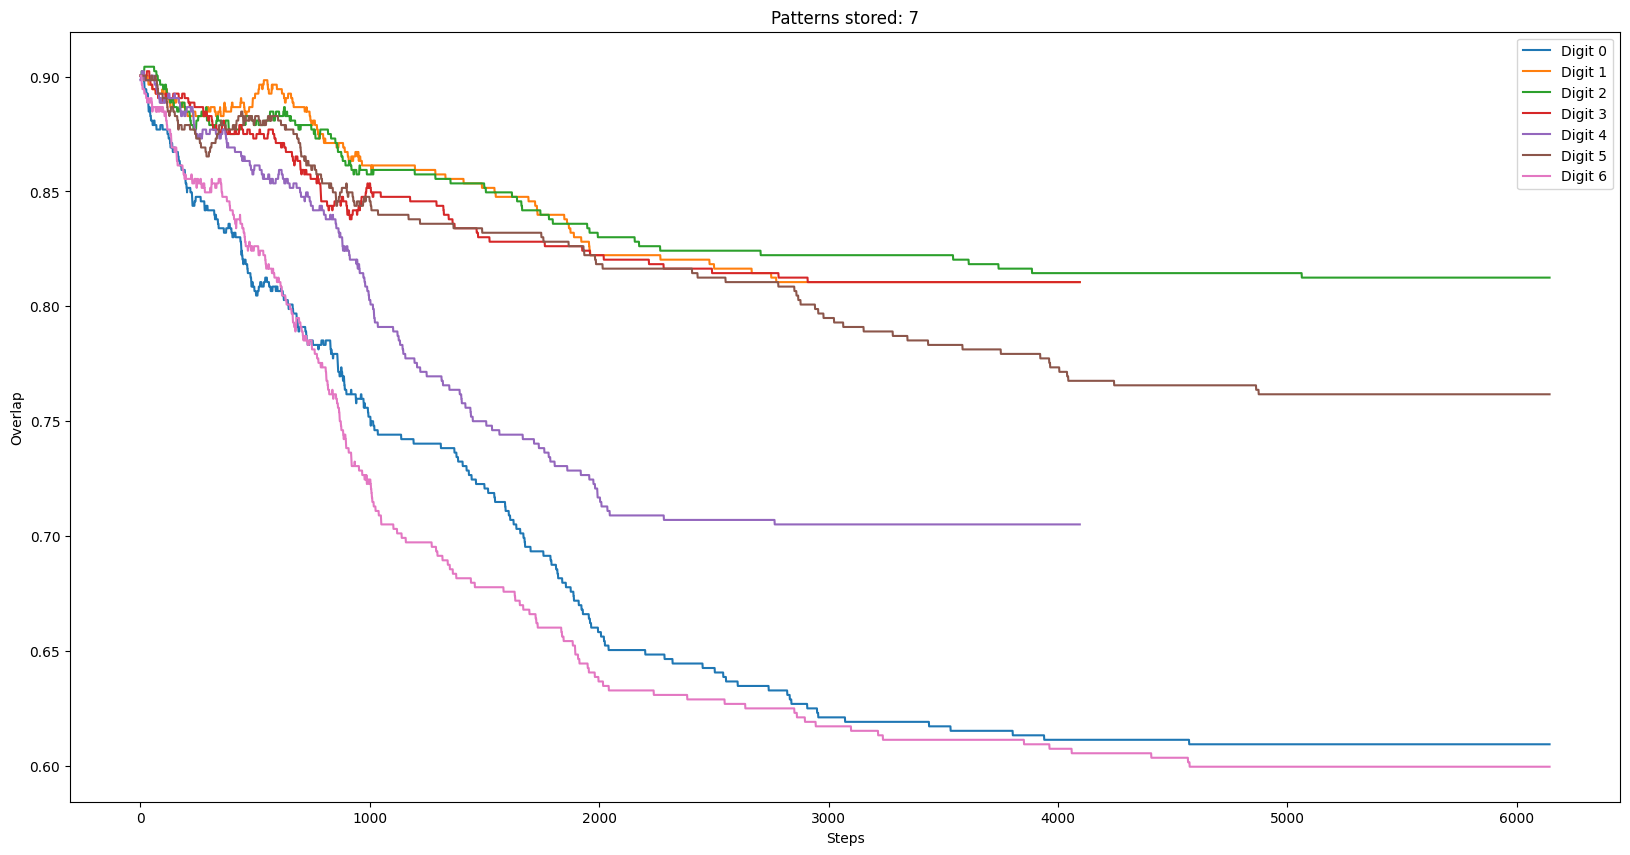

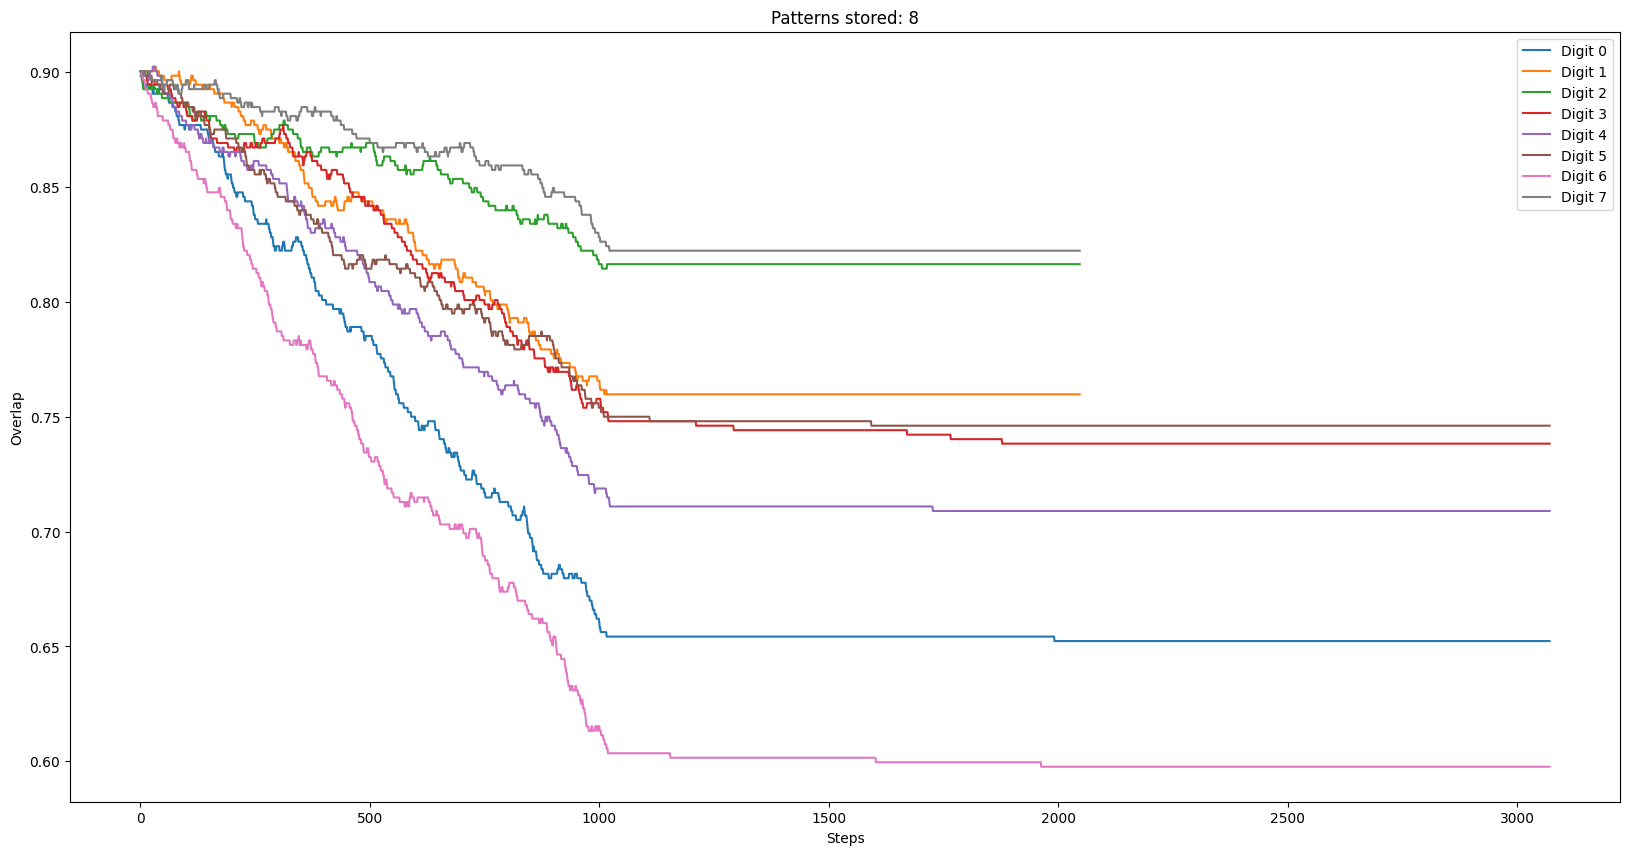

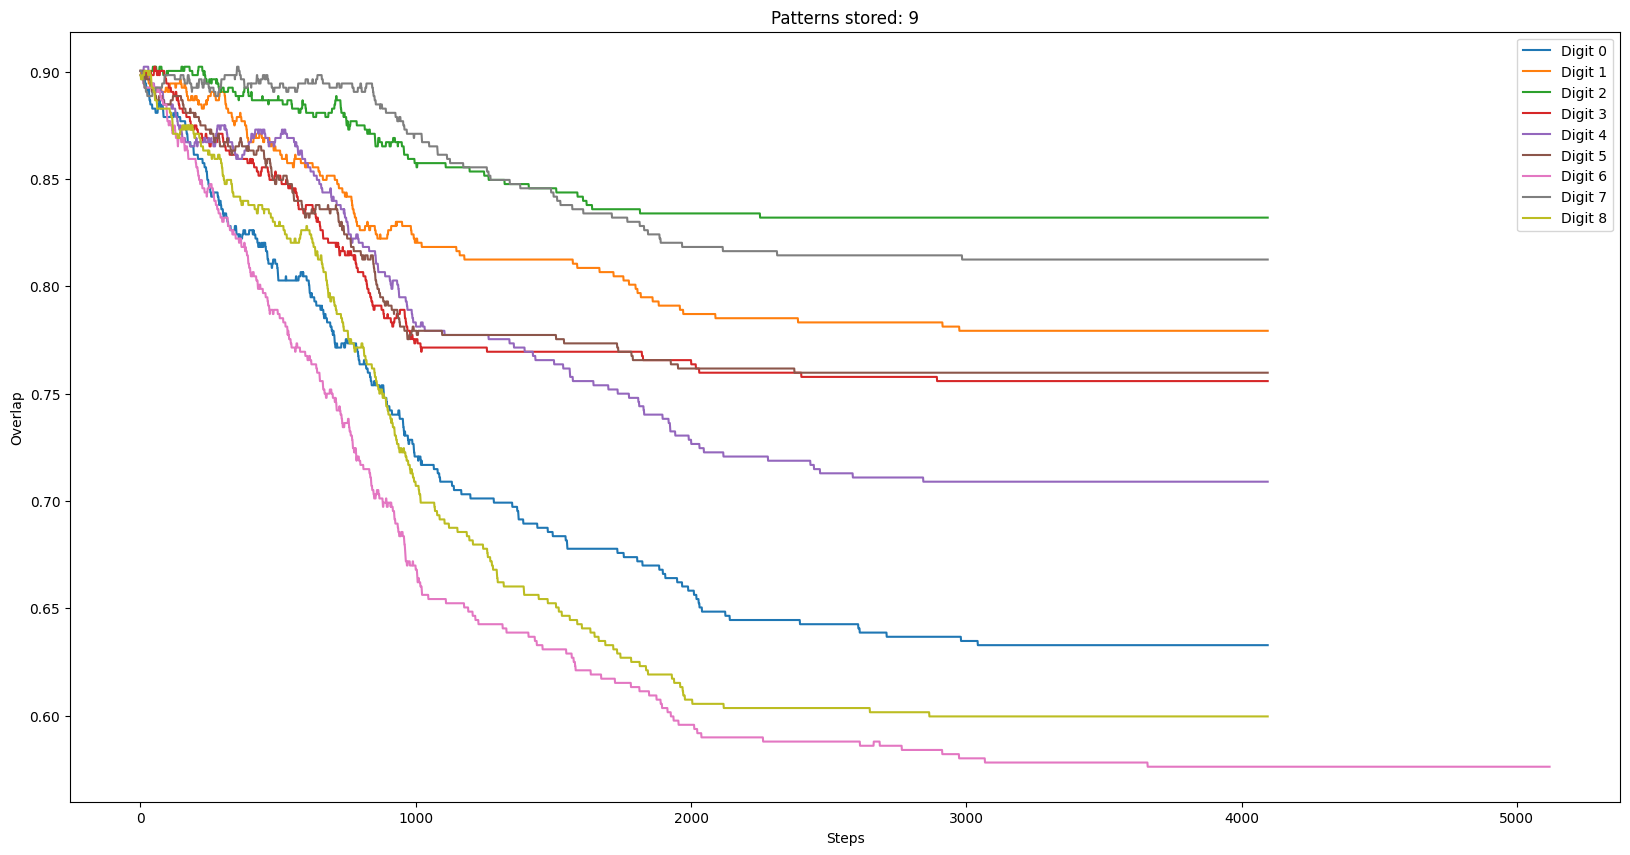

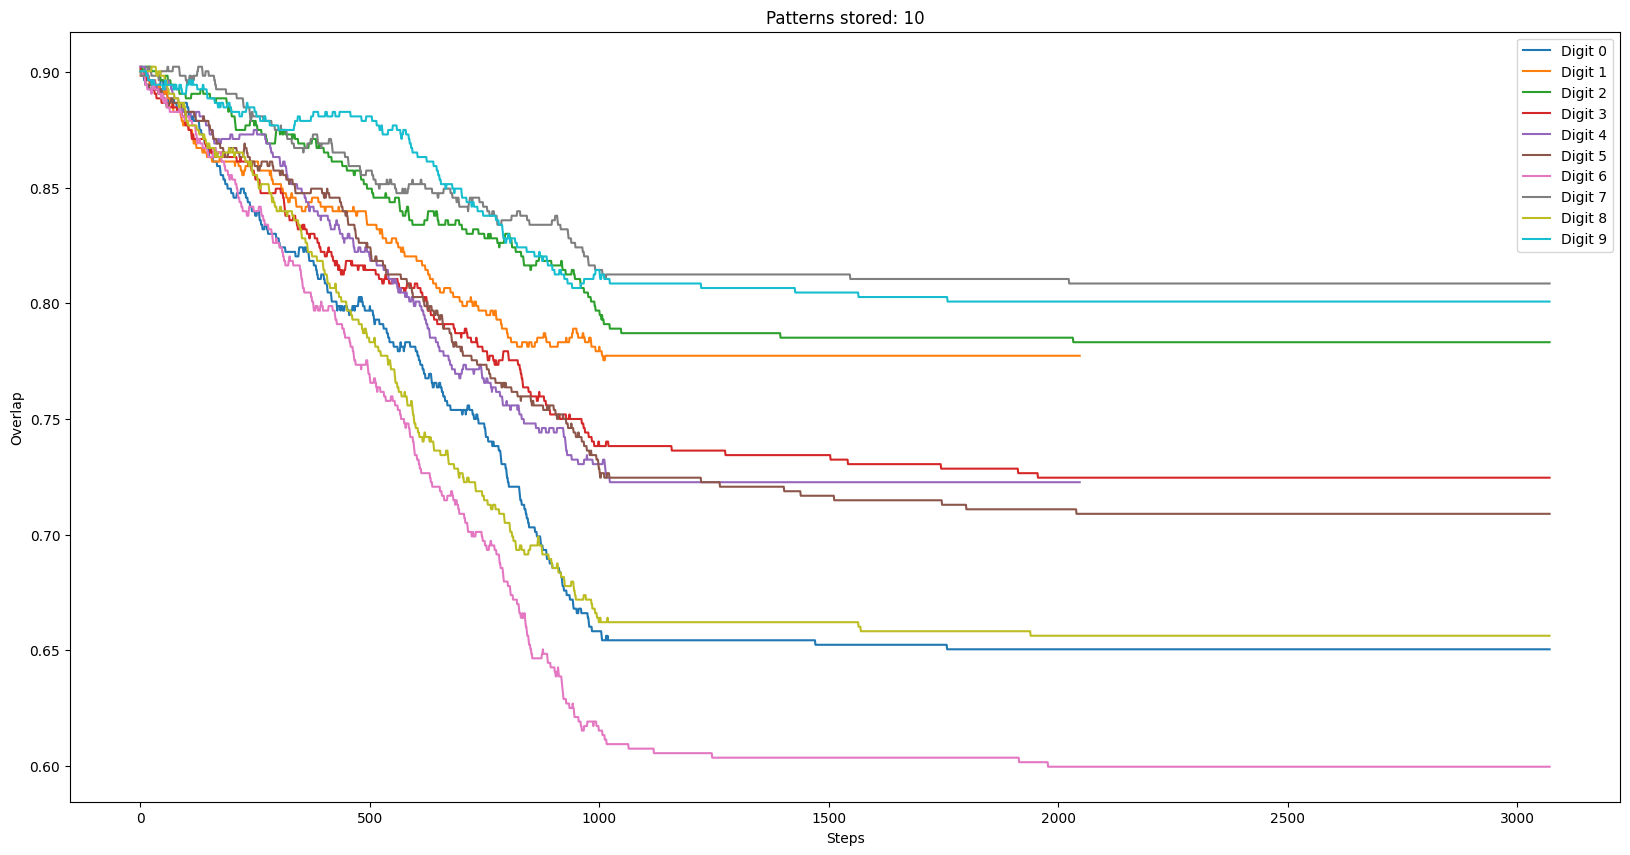

In [69]:
for i in range(8):
    plot_overlaps(overlap_history, i)